In [99]:
#PCA PART 1
from matplotlib import pyplot as plt
import numpy as np
import os
from PIL import Image
from skimage import color
from sklearn import decomposition

train_size = 800
test_size = 200
pixel_size = 128

#convert from RGB to HSV
parent_list = os.listdir("./images")
count = 0
X = np.zeros(shape=(train_size,pixel_size*pixel_size),dtype=float, order='C')
train_images_names = []
test_images_names = []
for child in parent_list:
    if child.startswith("."):
        continue;
    if count < train_size:
        im = Image.open("./images/" + child)
        np.seterr(divide='ignore', invalid='ignore')
        hsvimg = color.rgb2hsv(im)
        v_channel_values = hsvimg[:, :, 2]
        v_channel_values = v_channel_values.flatten()
        X[count] = v_channel_values
        train_images_names += [child]
    else:
        test_images_names += [child]
    count = count+1

In [100]:
print(X.shape)
print(X.dtype)
print(X)

(800, 16384)
float64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [101]:
X_mean = np.mean(X, axis=0)

for i in range(800):
    X[i,:] = X[i,:] - X_mean

X_covariance = np.cov(X.transpose())
(X_eigen, S, V) = np.linalg.svd(X_covariance)
    
print("Computed Eigen Vectors")

Computed Eigen Vectors


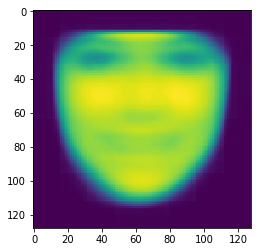

In [159]:
#Mean image
plt.imshow(X_mean.reshape(128,128))
plt.show()

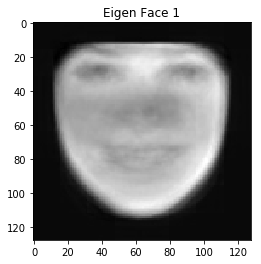

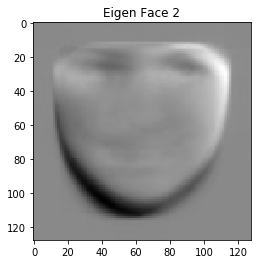

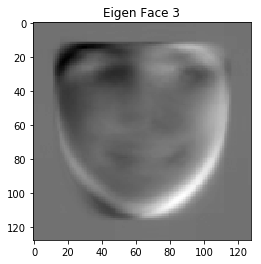

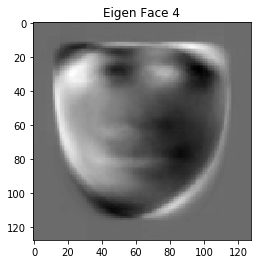

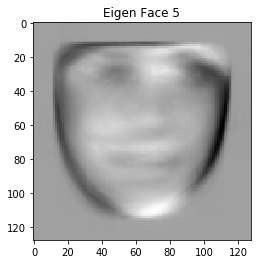

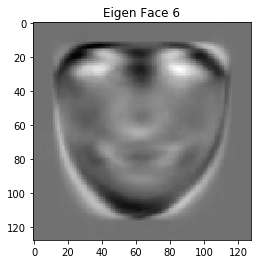

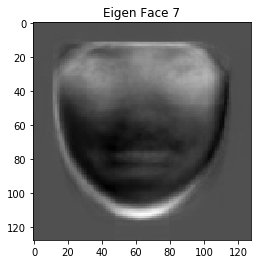

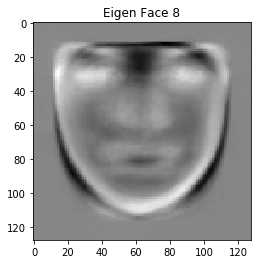

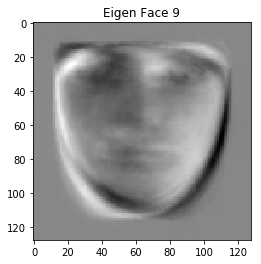

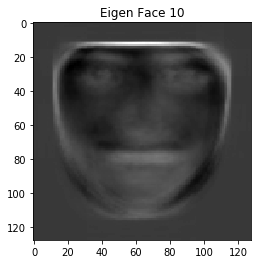

In [250]:
#plot first 10 eigen-faces
from skimage import io
for i in range(10):
    eigen_face = X_eigen[:,i].reshape(128,128)
    #io.imshow(eigen_face)
    #plt.title("Eigen Face " + str(i))
    plt.imshow(eigen_face, cmap="gray")
    plt.title("Eigen Face " + str(i+1))
    plt.show()


In [321]:
#Reconstruction
import warnings
warnings.filterwarnings('ignore')
X_test = np.zeros(shape=(test_size,pixel_size*pixel_size),dtype=float, order='C')
X_test_sub_mean = np.zeros(shape=(test_size,pixel_size*pixel_size),dtype=float, order='C')
#X_test_images_rgb = np.zeros(shape=(test_size,pixel_size,pixel_size,pixel_size),dtype=float, order='C')
X_test_images_hsv = np.zeros(shape=(test_size,pixel_size,pixel_size,3),dtype=float, order='C')

count = 0
for image_name in test_images_names:
    im = Image.open("./images/" + image_name)
    np.seterr(divide='ignore', invalid='ignore')
    hsvimg = color.rgb2hsv(im)
    #print(hsvimg.shape)
    #print(im.size)
    #print(X_test_images.shape)
    #X_test_images[count,:,:,:] = im
    #print(hsvimg.shape)
    #hsvimg = color.rgb2hsv(im)
    X_test_images_hsv[count,:,:,:] = hsvimg
    v_channel_values = hsvimg[:, :, 2]
    v_channel_values = v_channel_values.flatten()
    X_test[count] = v_channel_values
    count = count + 1

for i in range(200):
    X_test_sub_mean[i, :] = X_test[i, :] - X_mean



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


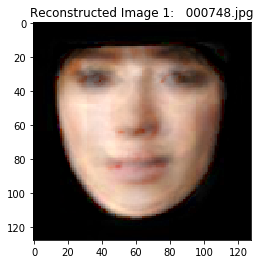

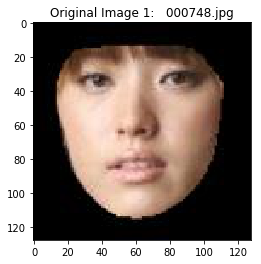

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


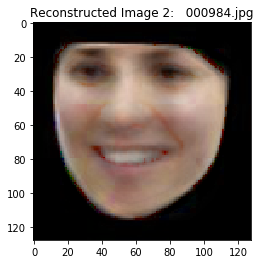

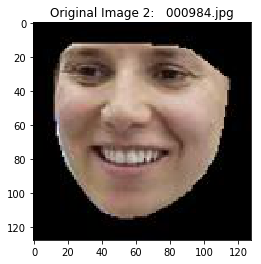

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


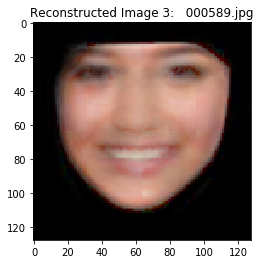

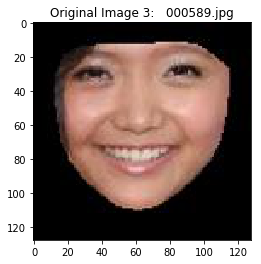

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


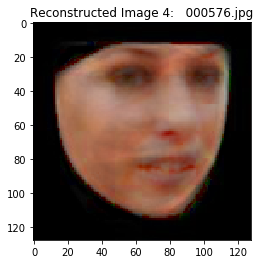

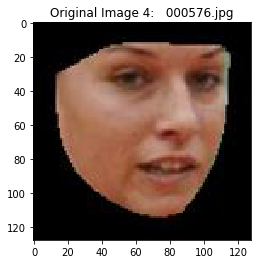

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


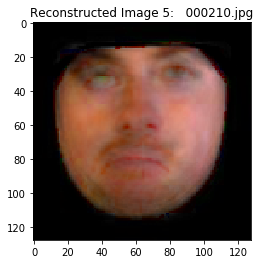

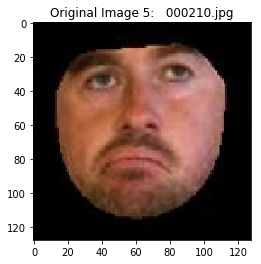

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


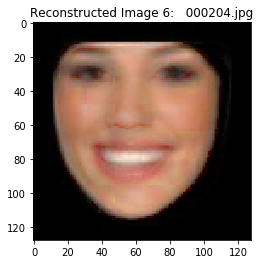

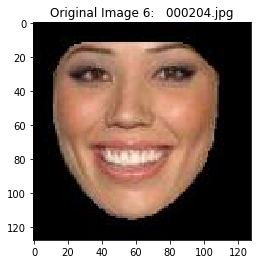

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


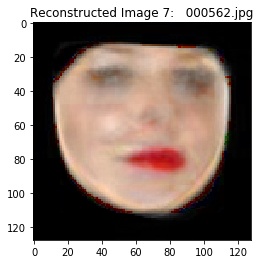

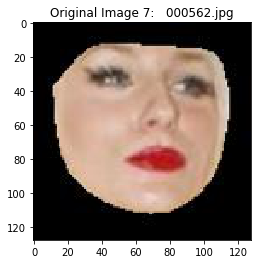

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


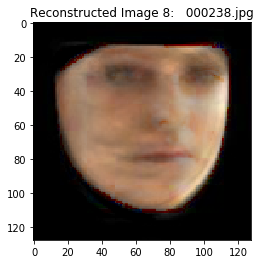

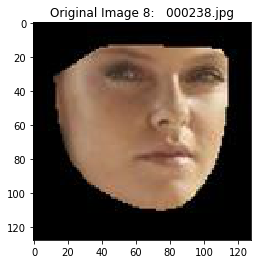

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


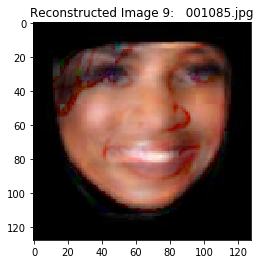

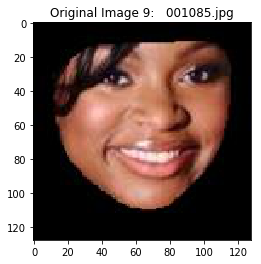

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


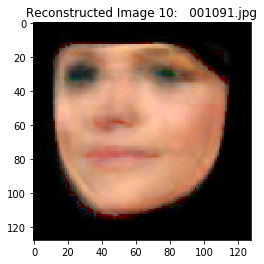

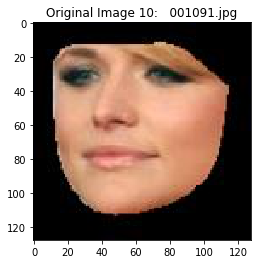

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


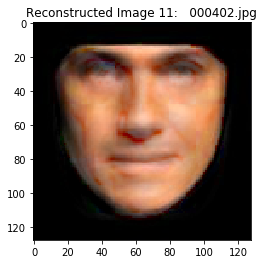

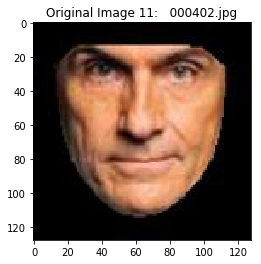

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


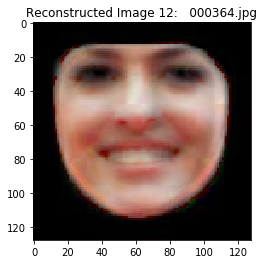

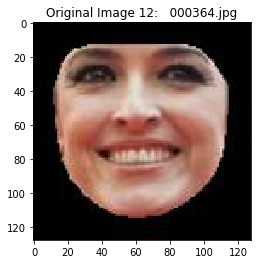

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


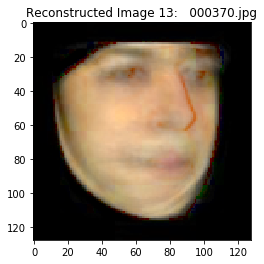

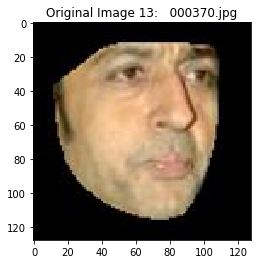

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


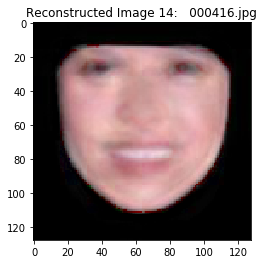

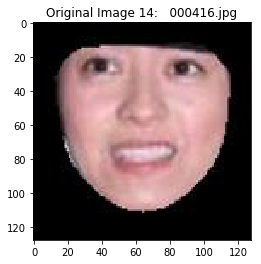

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


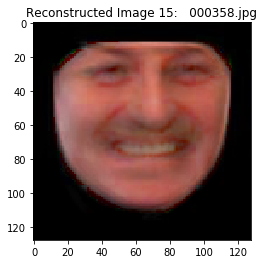

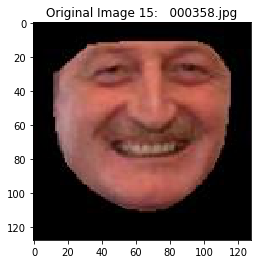

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


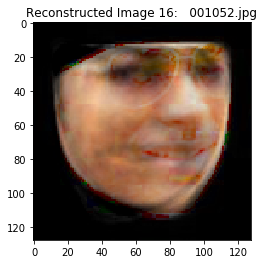

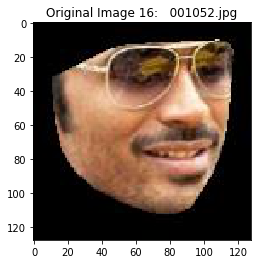

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


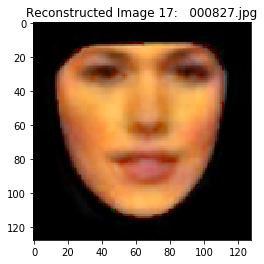

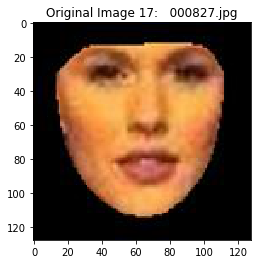

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


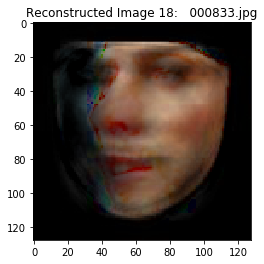

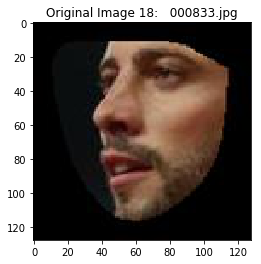

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


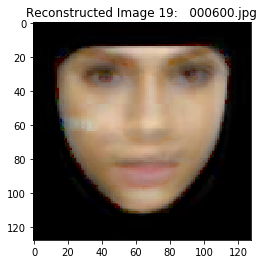

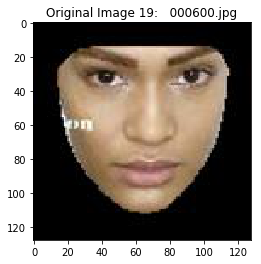

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


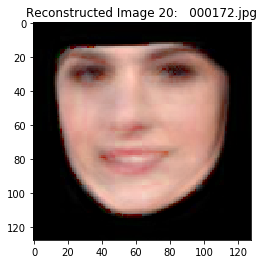

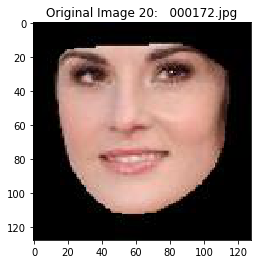

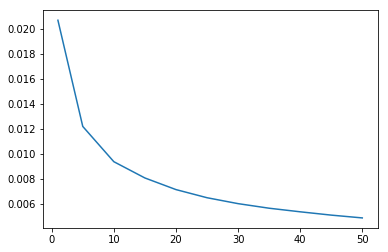

In [322]:
k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40 ,45 ,50]
mse = []
for k in k_values:
    X_eigen_reduce = X_eigen[:,0:k]   #16384*50
    X_eigen_reduce_t = X_eigen_reduce.transpose()   #50*16384
    X_test_projections = np.dot(X_eigen_reduce_t, X_test_sub_mean.transpose())   #50*16384 * 16384*200
    X_test_recon = np.dot(X_eigen_reduce, X_test_projections)   #16384*50 * 50*200
    X_test_recon = X_test_recon.transpose()   #200*16384
    for i in range(200):
        X_test_recon[i,:] = X_test_recon[i,:] + X_mean        
    if(k==50):
        for i in range(20):
            v_channel_recon = X_test_recon[i,:]
            v_channel_recon = v_channel_recon.reshape(pixel_size, pixel_size) #128*128
            hsvimg_recon = np.zeros(shape=(pixel_size,pixel_size,3),dtype=float, order='C') #128*128*3
            hsvimg_recon[:,:,0] = X_test_images_hsv[i,:,:,0]
            hsvimg_recon[:,:,1] = X_test_images_hsv[i,:,:,1]
            hsvimg_recon[:,:,2] = v_channel_recon
            rgbimg_recon = color.hsv2rgb(hsvimg_recon)
            plt.imshow(rgbimg_recon)
            plt.title("Reconstructed Image "+str(i+1) + ":   "+ test_images_names[i])
            plt.show()
            plt.imshow(Image.open("./images/" + test_images_names[i]))
            plt.title("Original Image "+str(i+1) + ":   "+ test_images_names[i])
            plt.show()
        
    error = (X_test - X_test_recon)
    sqaure_error = np.square(error)
    mse = mse + [(sqaure_error.sum())/(test_size*pixel_size*pixel_size)]

plt.plot(k_values, mse)

In [105]:
#PCA PART 2
from scipy.io import loadmat
lms_list = os.listdir("./landmarks")
lms_list.sort()
no_landmarks = 68
count1 = 0
count2 = 0
train_size = 800
test_size = 200
train_lm_names = []
test_lm_names = []
X_landmarks = np.zeros(shape=(train_size,no_landmarks*2),dtype=float, order='C')
X_landmarks_test = np.zeros(shape=(test_size,no_landmarks*2),dtype=float, order='C')
X_landmarks_test_sub_mean = np.zeros(shape=(test_size,no_landmarks*2),dtype=float, order='C')

for child in lms_list:
    lmdict = loadmat("./landmarks/" + child)
    lms = lmdict['lms']
    lms = lms.flatten()
    if count1<train_size:
        X_landmarks[count1] = lms
    else:
        X_landmarks_test[count2] = lms
        test_lm_names = test_lm_names + [child]
        count2 +=1
    count1 += 1




In [106]:
X_landmarks_mean = np.mean(X_landmarks, axis=0)

for i in range(800):
    X_landmarks[i,:] = X_landmarks[i,:] - X_landmarks_mean

X_landmarks_covariance = np.cov(X_landmarks.transpose())
(X_landmarks_eigen, S_landmarks, V) = np.linalg.svd(X_landmarks_covariance)
    
print("Computed Eigen Vectors")

Computed Eigen Vectors


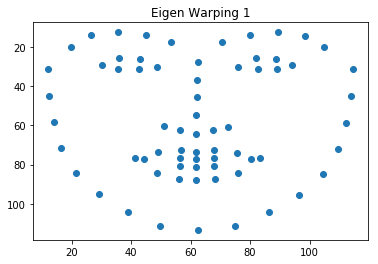

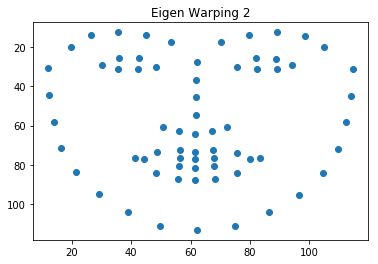

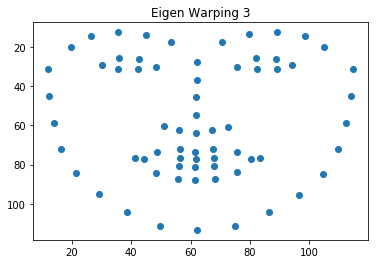

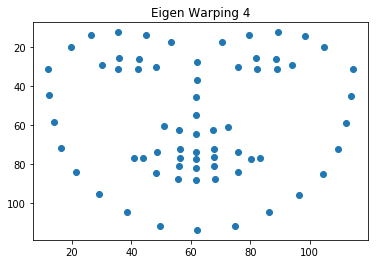

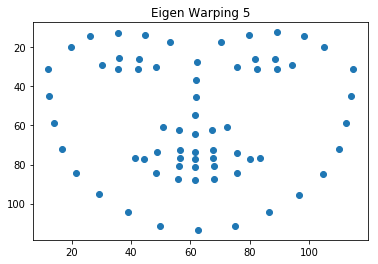

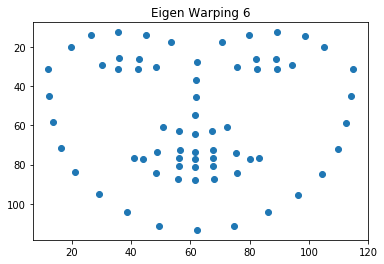

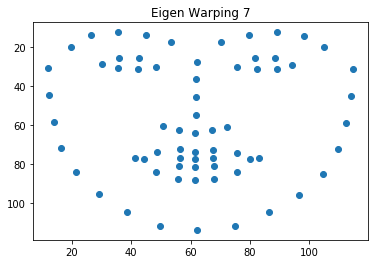

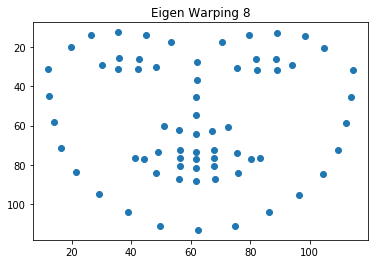

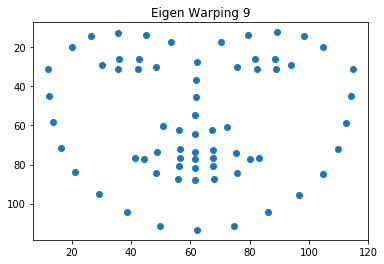

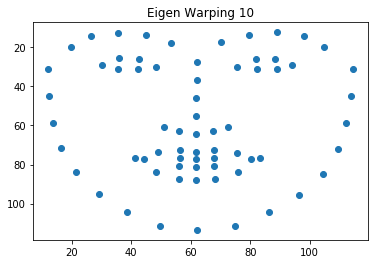

In [107]:
#plot first 10 eigen-warpings
for i in range(10):
    eigen_warping = X_landmarks_eigen[:,i] + X_landmarks_mean
    eigen_warping = eigen_warping.reshape(68,2)
    plt.scatter(eigen_warping[:,0], eigen_warping[:,1])
    plt.title("Eigen Warping " + str(i+1))
    plt.gca().invert_yaxis()
    plt.show()

    """#io.imshow(eigen_face)
    #plt.title("Eigen Face " + str(i))
    plt.imshow(eigen_face, cmap="gray")
    plt.title("Eigen Face " + str(i+1))
    plt.show()

X_landmarks_eigen_reduce = X_landmarks_eigen[:,0]
X_landmarks_eigen_reduce = X_landmarks_eigen_reduce + X_landmarks_mean
X_landmarks_eigen_reduce = X_landmarks_eigen_reduce.reshape(68,2)
X_landmarks_eigen_reduce.shape
print(X_landmarks_eigen_reduce[:,0].shape)
print(X_landmarks_eigen_reduce[:,1].shape)
plt.scatter(X_landmarks_eigen_reduce[:,0], X_landmarks_eigen_reduce[:,1])
plt.show()
"""


In [29]:
len(test_lm_names)

200

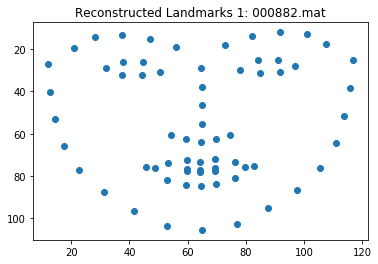

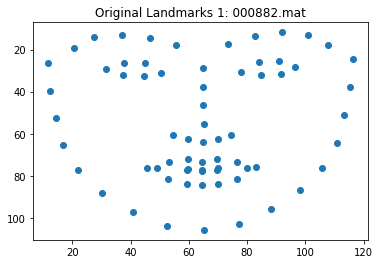

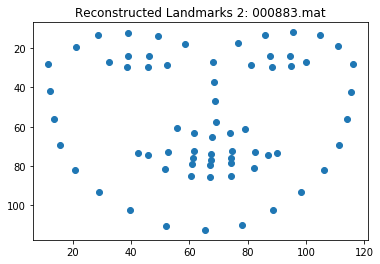

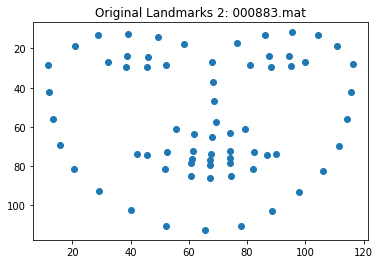

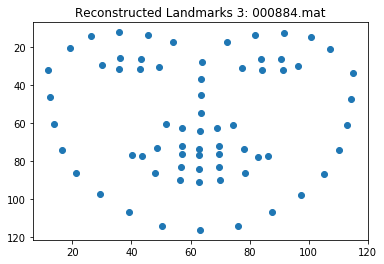

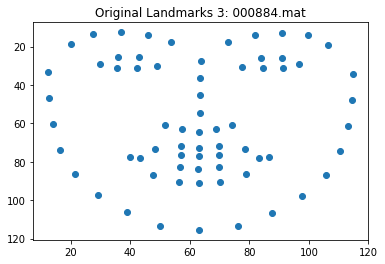

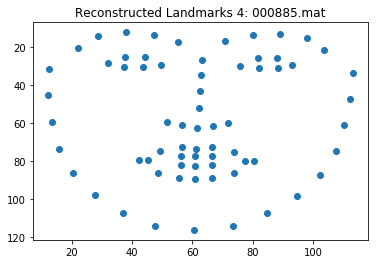

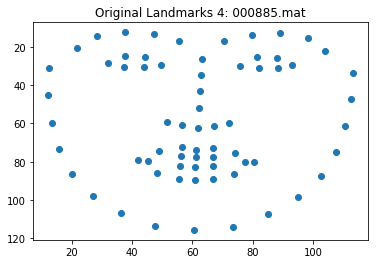

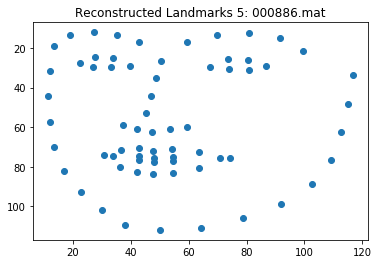

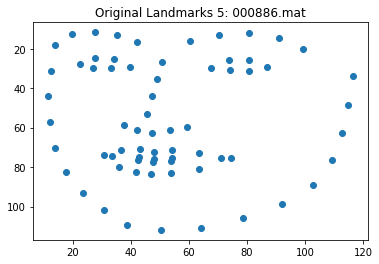

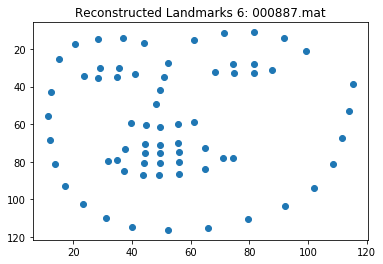

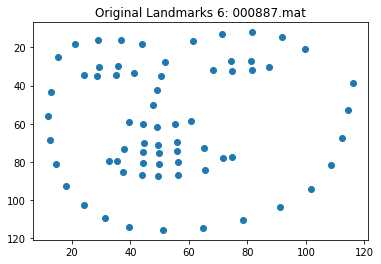

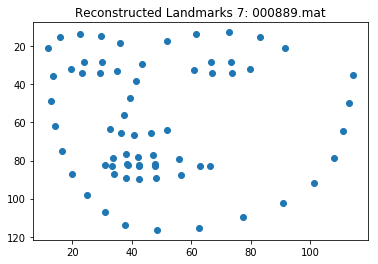

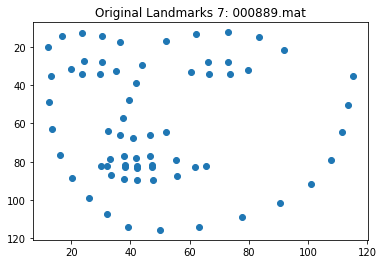

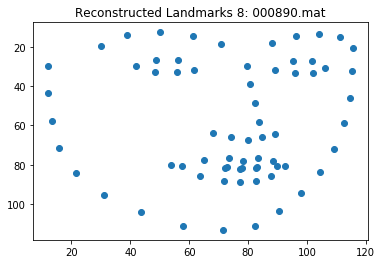

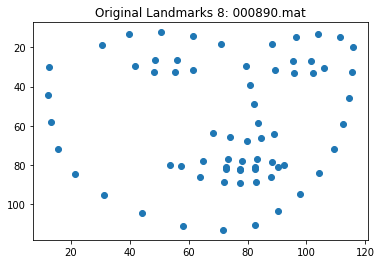

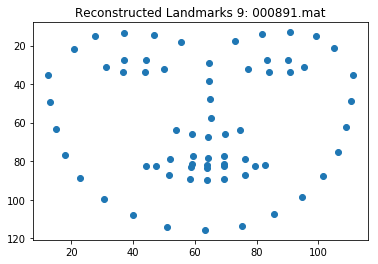

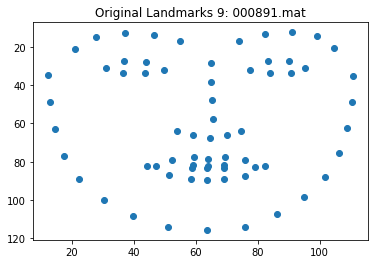

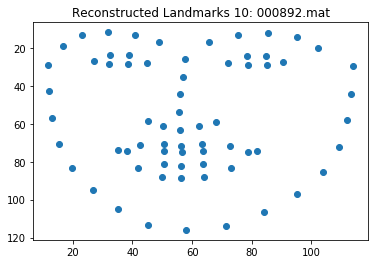

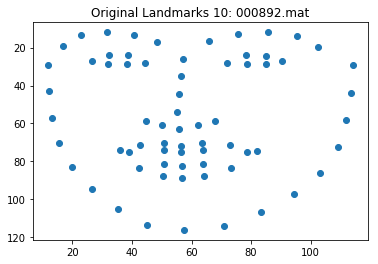

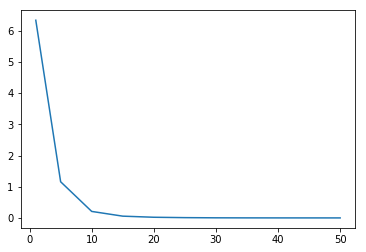

In [108]:
#Reconstrcuting landmarks

for i in range(200):
    X_landmarks_test_sub_mean[i, :] = X_landmarks_test[i, :] - X_landmarks_mean

k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40 ,45 ,50]
mse = []
for k in k_values:
    X_landmarks_reduce = X_landmarks_eigen[:,0:k]   #136*10
    X_landmarks_reduce_t = X_landmarks_reduce.transpose()   #10*136
    X_landmarks_test_projections = np.dot(X_landmarks_reduce_t, X_landmarks_test_sub_mean.transpose())   #10*136 * 136*200
    X_test_landmarks_recon = np.dot(X_landmarks_reduce, X_landmarks_test_projections)   #136*10 * 10*200
    X_test_landmarks_recon = X_test_landmarks_recon.transpose()   #200*136
    for i in range(200):
        X_test_landmarks_recon[i,:] = X_test_landmarks_recon[i,:] + X_landmarks_mean        
    if(k==10):
        for i in range(10):
            lms = X_test_landmarks_recon[i,:]
            lms = lms.reshape(68,2)
            plt.scatter(lms[:,0], lms[:,1])
            plt.title("Reconstructed Landmarks " + str(i+1) + ": " + test_lm_names[i])
            plt.gca().invert_yaxis()
            plt.show()
            org_lms = loadmat("./landmarks/" + test_lm_names[i])
            org_lms = org_lms['lms']
            plt.scatter(org_lms[:,0], org_lms[:,1])
            plt.title("Original Landmarks " + str(i+1) + ": " + test_lm_names[i])
            plt.gca().invert_yaxis()
            plt.show()

    error = (X_landmarks_test - X_test_landmarks_recon)
    sqaure_error = np.square(error)
    mse = mse + [(sqaure_error.sum())/(test_size*no_landmarks*2)]

plt.plot(k_values, mse)


In [143]:
#PCA Part 3
im_list = os.listdir("./images")
im_list.sort()
del im_list[im_list.index(".DS_Store")]


In [130]:
import cv2
import mywarper
training_im_list = []
test_im_list = []

"""im = cv2.imread("./images/" + im_list[0])
print(im_list[0])
slms = loadmat("./landmarks/"+lms_list[0])['lms']
print(lms_list[0])"""

dlms = X_landmarks_mean.reshape(68, 2)

"""warpedimg = mywarper.warp(im, slms, dlms)
plt.imshow(warpedimg)
plt.show()"""


count1 = 0
count2 = 0
X_w = np.zeros(shape=(train_size,pixel_size*pixel_size),dtype=float, order='C')
X_w_test = np.zeros(shape=(test_size,pixel_size*pixel_size),dtype=float, order='C')
for child in im_list:
    im = cv2.imread("./images/" + child)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    warpedim = mywarper.warp(im, loadmat("./landmarks/"+lms_list[count1])['lms'], dlms)
    hsvimg = color.rgb2hsv(warpedim)
    v_channel_values = hsvimg[:, :, 2]
    v_channel_values = v_channel_values.flatten()
    if count1 < train_size:
        X_w[count1] = v_channel_values
        training_im_list += [child]
    else:
        X_w_test[count2] = v_channel_values
        test_im_list += [child]
        count2 += 1
    count1 = count1+1
    
print(X_w.shape)
print(X_w_test.shape)

(800, 16384)
(200, 16384)


In [131]:
X_w_mean = np.mean(X_w, axis=0)


for i in range(800):
    X_w[i,:] = X_w[i,:] - X_w_mean

X_w_covariance = np.cov(X_w.transpose())
(X_w_eigen, S_w, V) = np.linalg.svd(X_w_covariance)
    
print("Computed Eigen Vectors")

Computed Eigen Vectors


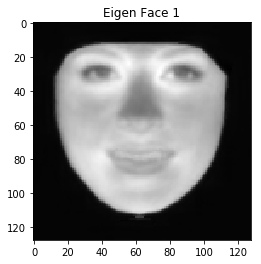

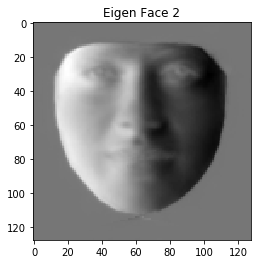

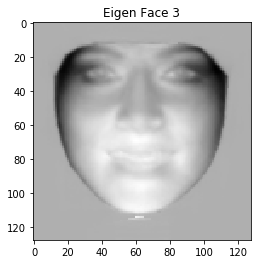

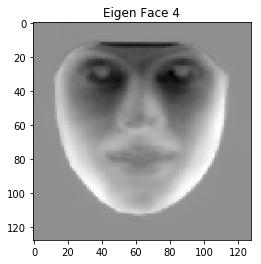

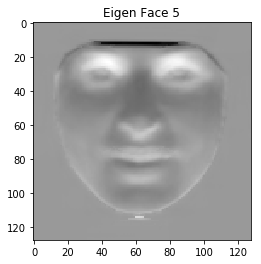

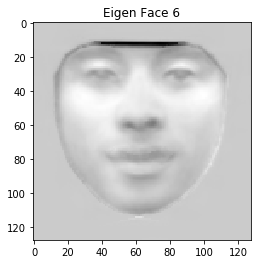

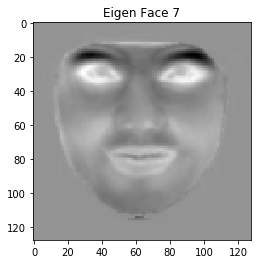

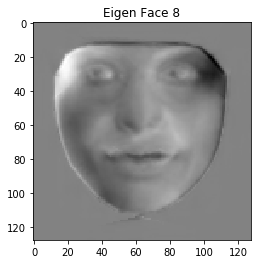

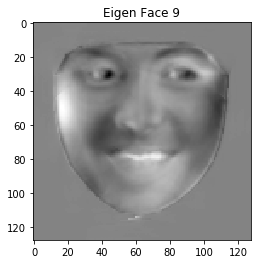

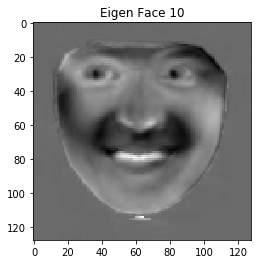

In [254]:
#plot first 10 eigen-faces
from skimage import io
for i in range(10):
    eigen_face = X_w_eigen[:,i].reshape(128,128)
    #io.imshow(eigen_face)
    #plt.title("Eigen Face " + str(i))
    plt.imshow(eigen_face, cmap="gray")
    plt.title("Eigen Face " + str(i+1))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


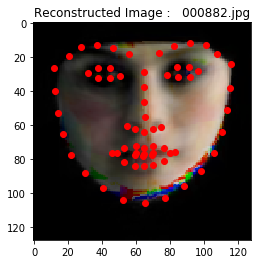

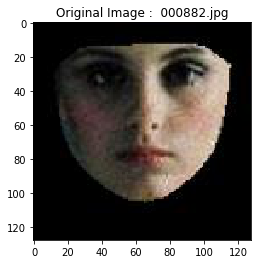

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


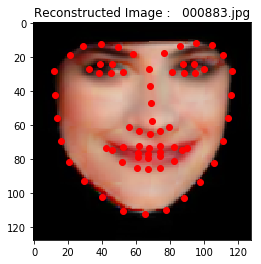

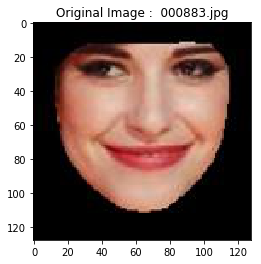

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


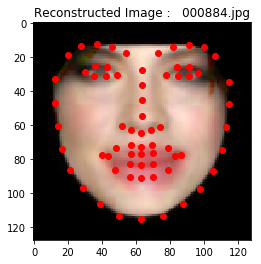

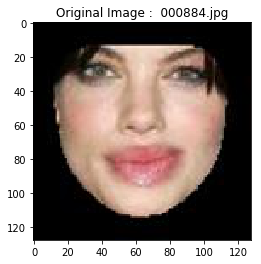

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


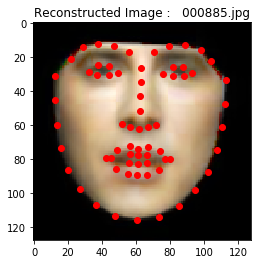

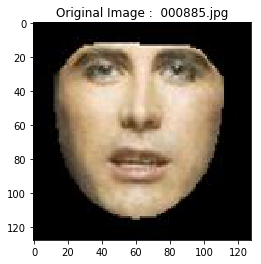

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


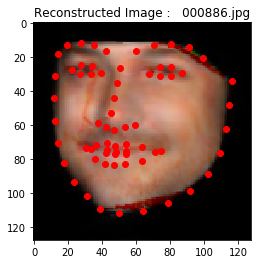

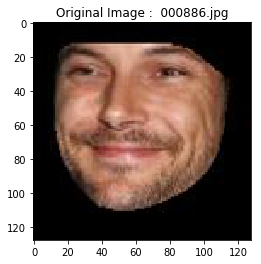

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


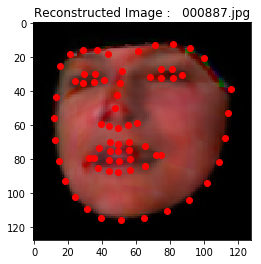

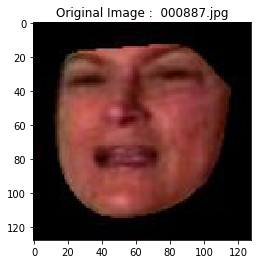

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


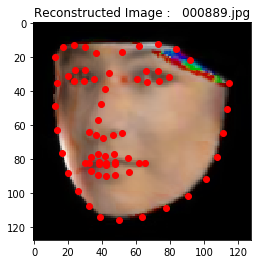

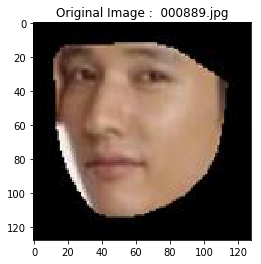

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


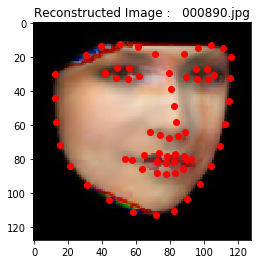

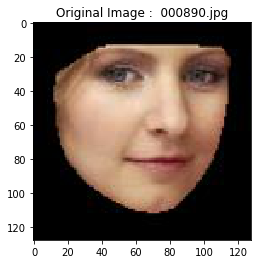

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


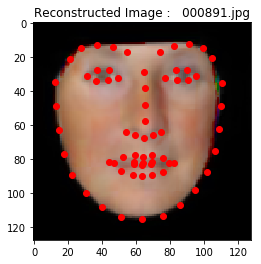

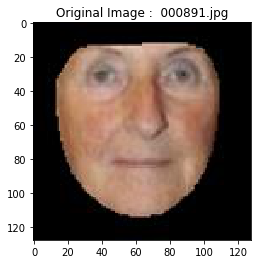

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


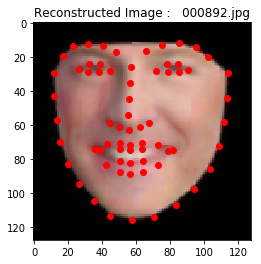

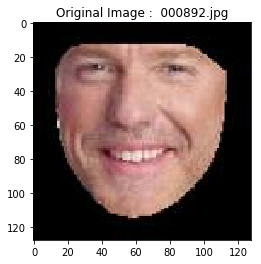

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


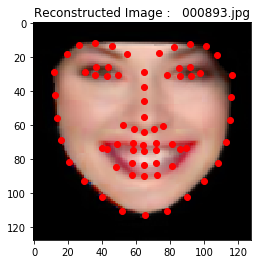

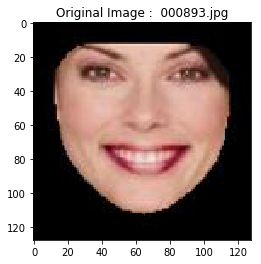

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


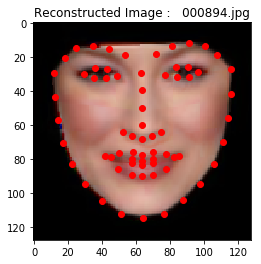

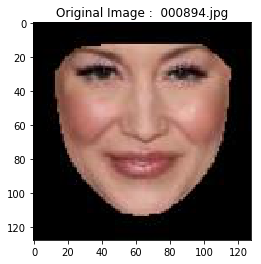

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


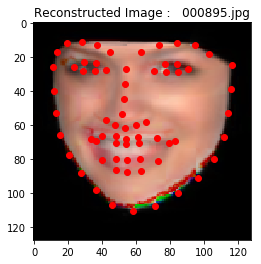

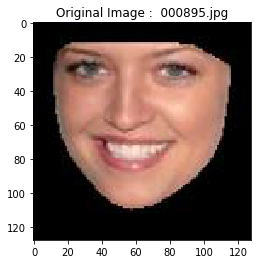

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


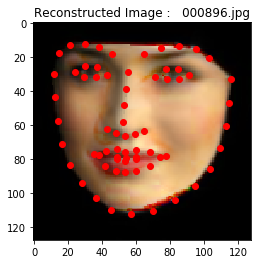

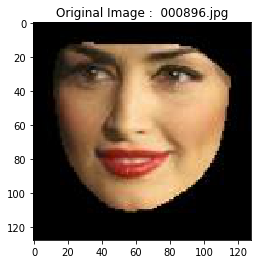

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


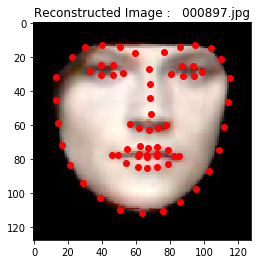

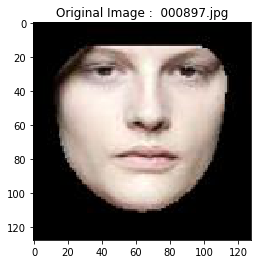

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


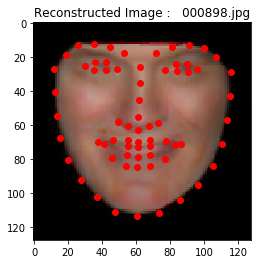

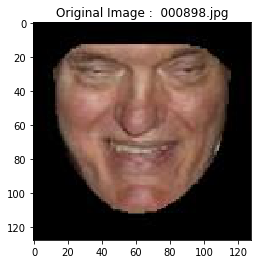

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


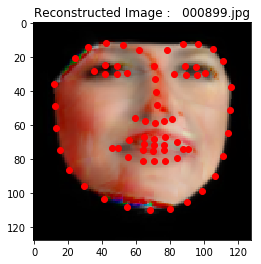

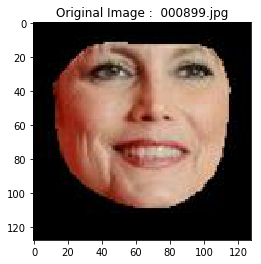

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


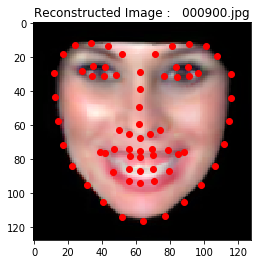

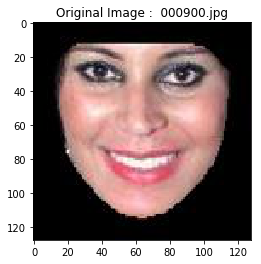

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


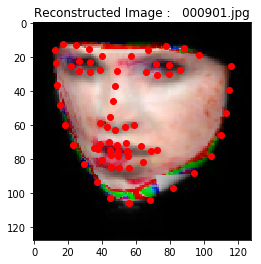

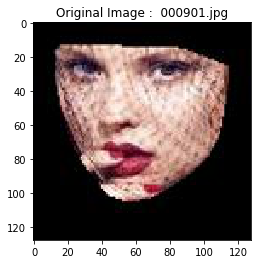

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


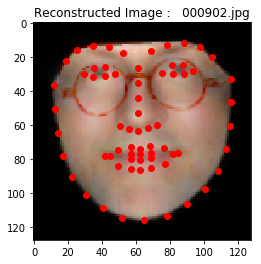

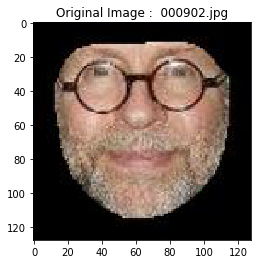

In [323]:
#Reconstruction
X_w_test_sub_mean = np.zeros(shape=(test_size,pixel_size*pixel_size),dtype=float, order='C')

for i in range(200):
    X_w_test_sub_mean[i, :] = X_w_test[i, :] - X_w_mean
    
k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40 ,45 ,50]
mse = []
for k in k_values:
    X_w_eigen_reduce = X_w_eigen[:,0:k]   #16384*50
    X_w_eigen_reduce_t = X_w_eigen_reduce.transpose()   #50*16384
    X_w_test_projections = np.dot(X_w_eigen_reduce_t, X_w_test_sub_mean.transpose())   #50*16384 * 16384*200
    X_w_test_recon = np.dot(X_w_eigen_reduce, X_w_test_projections)   #16384*50 * 50*200
    X_w_test_recon = X_w_test_recon.transpose()   #200*16384
    for i in range(200):
        X_w_test_recon[i,:] = X_w_test_recon[i,:] + X_w_mean
        v_channel_recon = X_w_test_recon[i,:]
        v_channel_recon = v_channel_recon.reshape(pixel_size, pixel_size)
        hsvimg_recon = np.zeros(shape=(pixel_size,pixel_size,3),dtype=float, order='C') #128*128*3
        hsvimg = color.rgb2hsv(Image.open("./images/" + test_im_list[i]))
        hsvimg_recon[:,:,0] = hsvimg[:,:,0]
        hsvimg_recon[:,:,1] = hsvimg[:,:,1]
        hsvimg_recon[:,:,2] = v_channel_recon
        rgbimg_recon = color.hsv2rgb(hsvimg_recon)
        warped_rgb_recon = mywarper.warp(rgbimg_recon, dlms, (X_test_landmarks_recon[i,:]).reshape(68, 2))
        if k==50:
            if(i<20):
                plt.imshow(warped_rgb_recon)
                points = (X_test_landmarks_recon[i,:]).reshape(68, 2)
                plt.scatter(points[:,0], points[:,1], c='r')
                plt.title("Reconstructed Image :   "+ test_im_list[i])
                plt.show()
                plt.imshow(Image.open("./images/" + test_im_list[i]))
                plt.title("Original Image :  "+ test_im_list[i])
                plt.show()
        hsvimg = color.rgb2hsv(warped_rgb_recon)
        v_channel_values = hsvimg[:, :, 2]
        v_channel_values = v_channel_values.flatten()
        X_w_test_recon[i,:] = v_channel_values
    '''if(k==50):
        for i in range(10):
            v_channel_recon = X_test_recon[i,:]
            v_channel_recon = v_channel_recon.reshape(pixel_size, pixel_size) #128*128
            hsvimg_recon = np.zeros(shape=(pixel_size,pixel_size,3),dtype=float, order='C') #128*128*3
            hsvimg_recon[:,:,0] = X_test_images_hsv[i,:,:,0]
            hsvimg_recon[:,:,1] = X_test_images_hsv[i,:,:,1]
            hsvimg_recon[:,:,2] = v_channel_recon
            rgbimg_recon = color.hsv2rgb(hsvimg_recon)
            plt.imshow(rgbimg_recon)
            plt.title("Reconstructed Image "+str(i+1) + ":   "+ test_images_names[i])
            plt.show()
            plt.imshow(Image.open("./images/" + test_images_names[i]))
            plt.title("Original Image "+str(i+1) + ":   "+ test_images_names[i])
            plt.show()'''
        
    error = (X_w_test - X_w_test_recon)
    sqaure_error = np.square(error)
    mse = mse + [(sqaure_error.sum())/(test_size*pixel_size*pixel_size)]



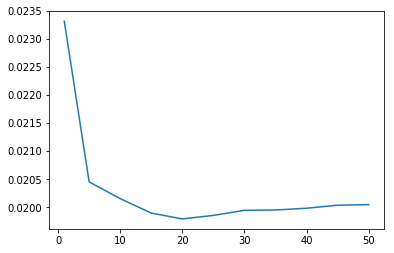

In [324]:
plt.plot(k_values, mse)

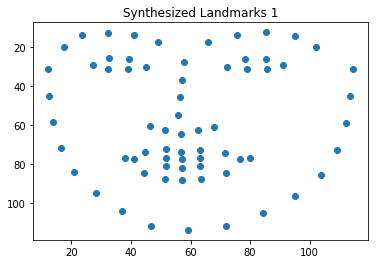

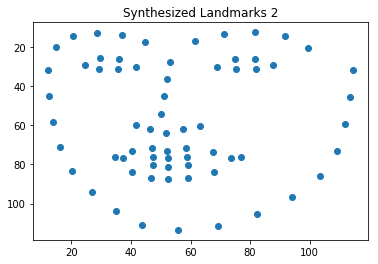

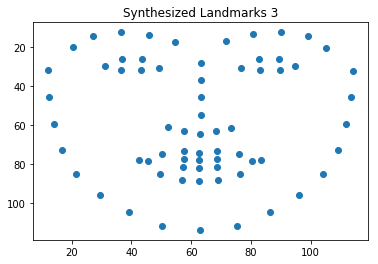

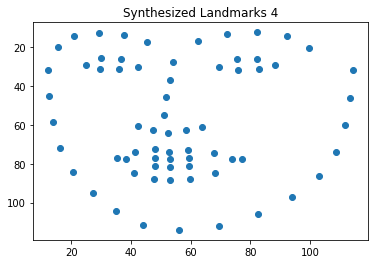

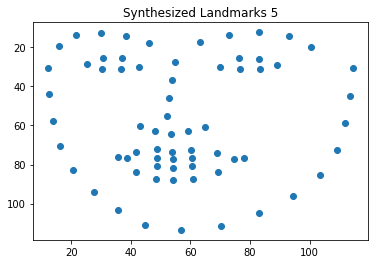

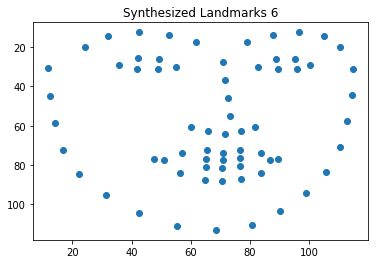

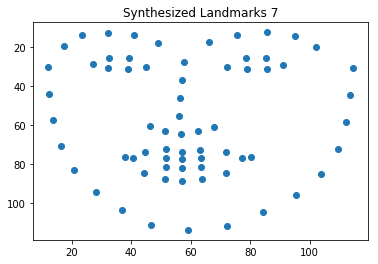

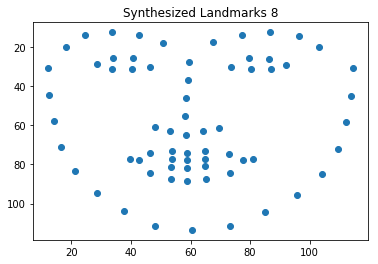

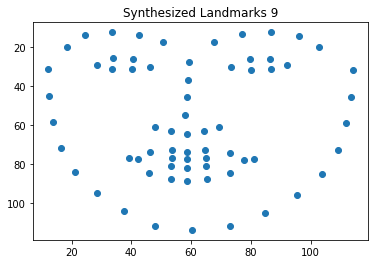

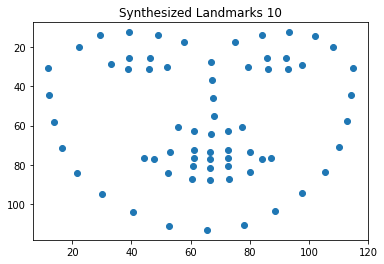

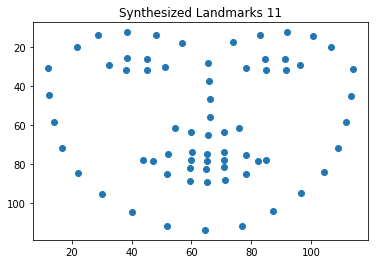

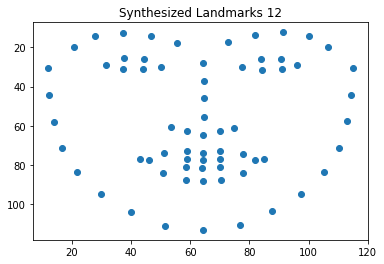

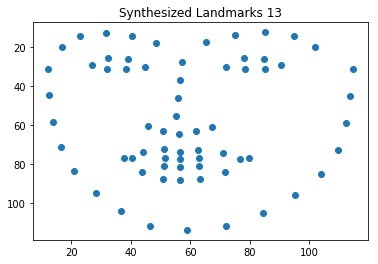

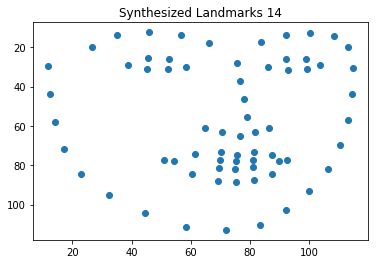

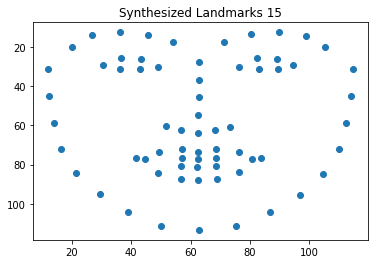

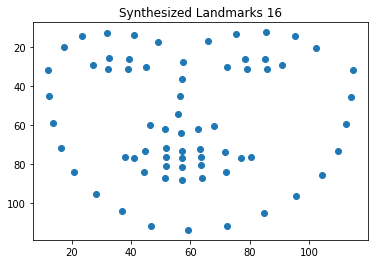

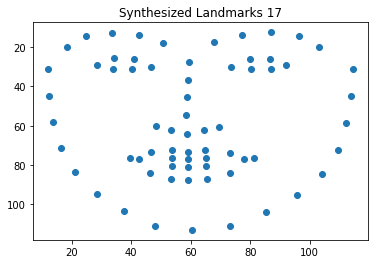

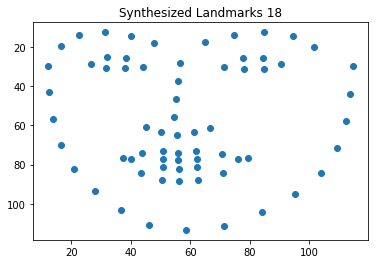

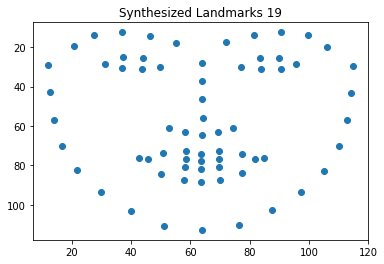

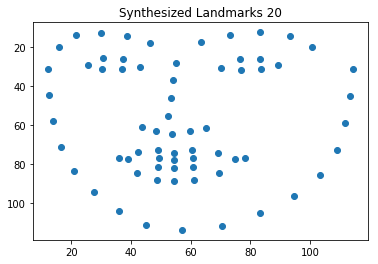

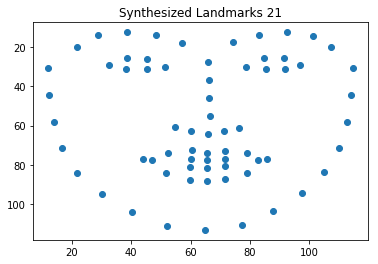

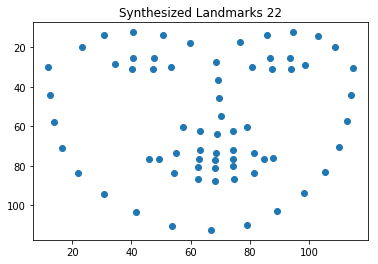

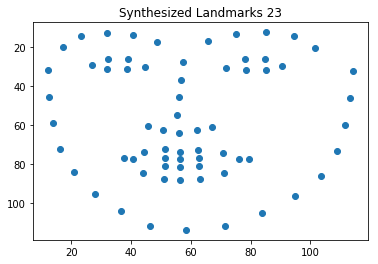

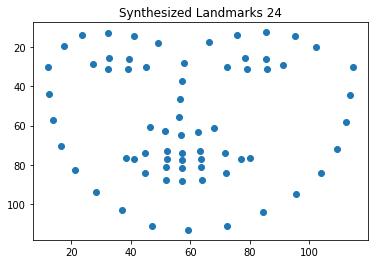

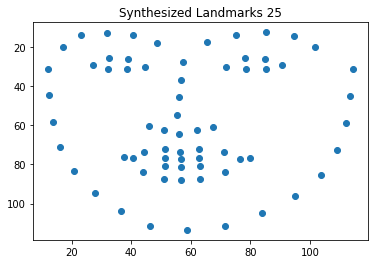

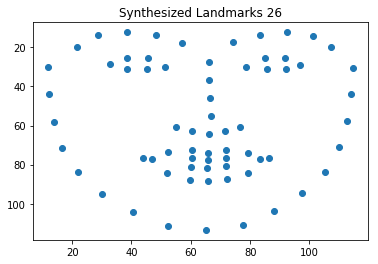

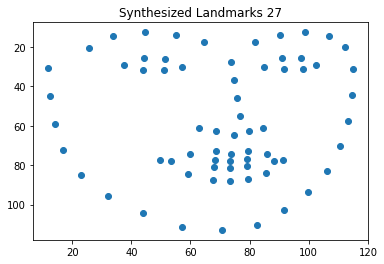

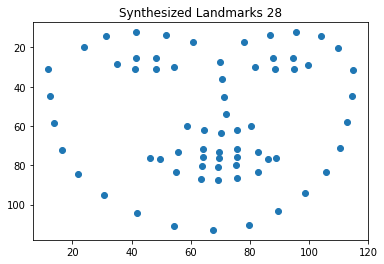

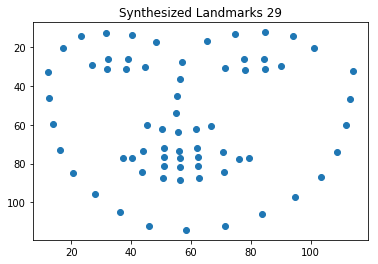

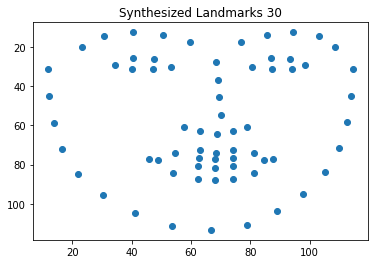

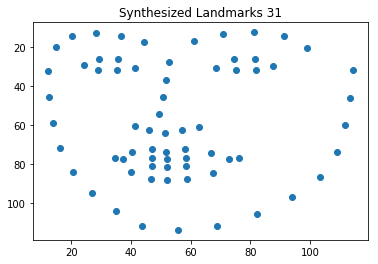

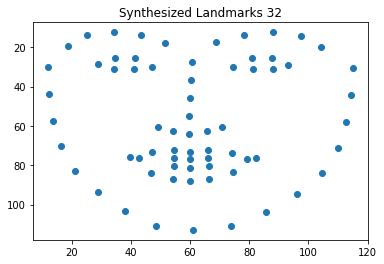

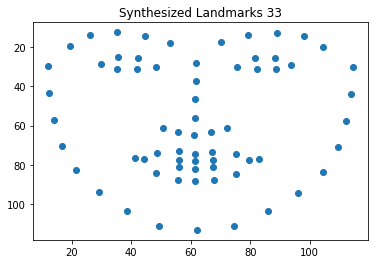

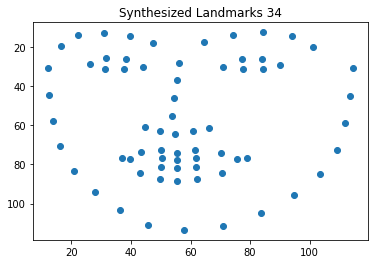

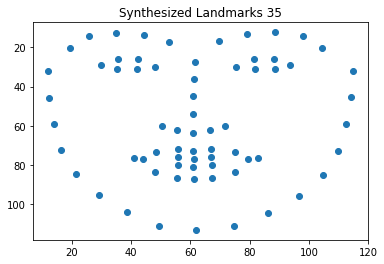

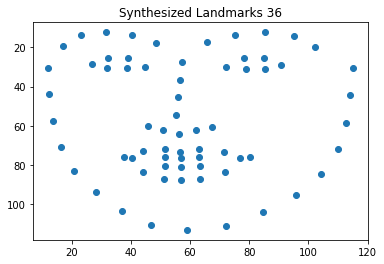

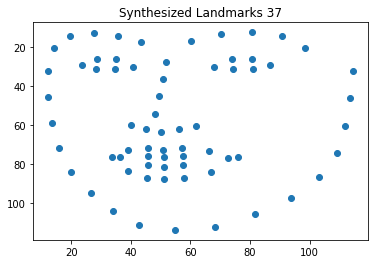

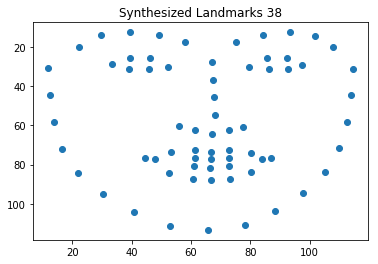

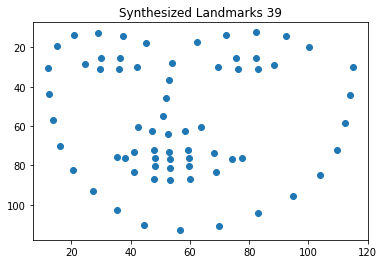

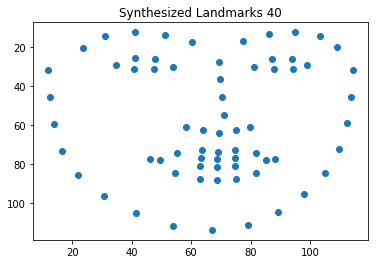

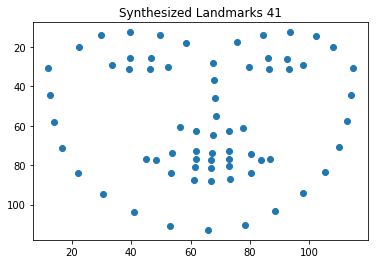

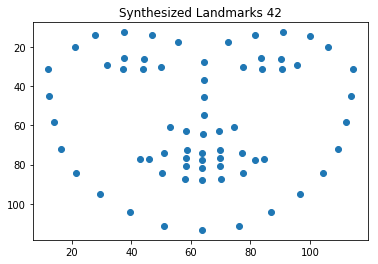

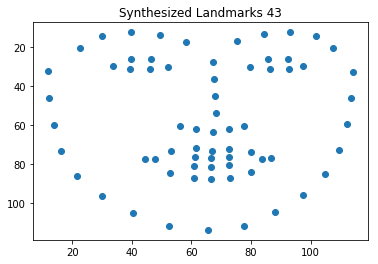

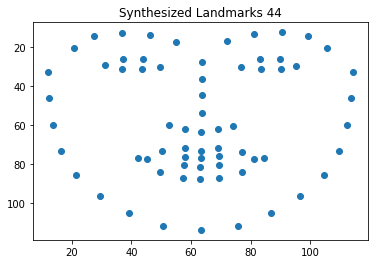

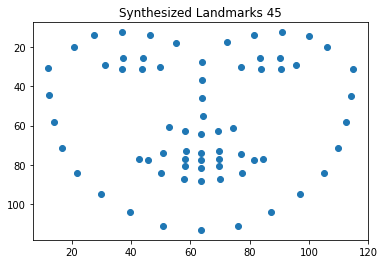

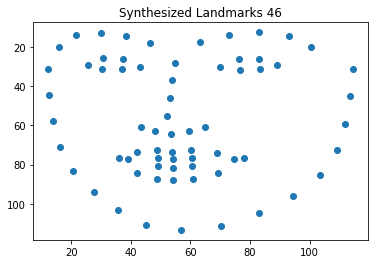

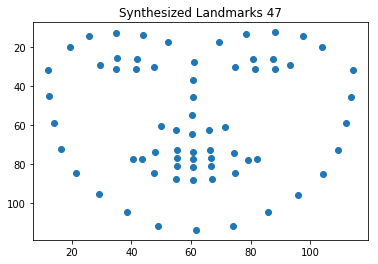

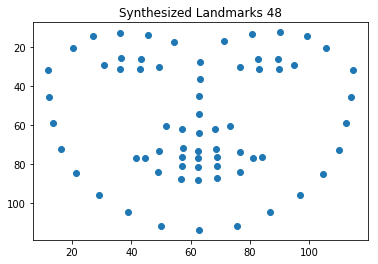

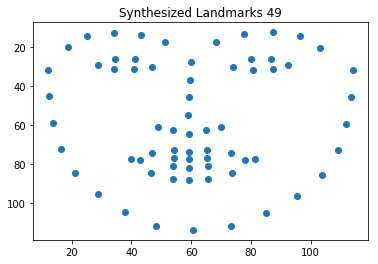

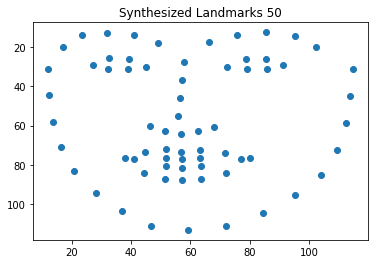

In [133]:
#PCA Part 4
#Landmarks Synthesis
synth_lm = np.zeros(shape=(50,136))
synth_proj = np.zeros(shape=(50, 10))
rand_lm = np.zeros(shape=(10))
X_landmarks_synth = X_landmarks_eigen[:,0:10]


for n1 in range(50):
    for n2 in range(10):
        rand_lm[n2] = (np.random.normal(loc=0.0,scale=S_landmarks[n2]))/float(128)
    synth_proj[n1,:] = rand_lm
    synth_lm[n1, :] = np.dot(X_landmarks_synth, synth_proj[n1,:])
    synth_lm[n1, :] = synth_lm[n1, :] + X_landmarks_mean
    points = synth_lm[n1, :].reshape(68,2)
    plt.scatter(points[:,0], points[:,1])
    plt.title("Synthesized Landmarks " + str(n1+1))
    plt.gca().invert_yaxis()
    plt.show()



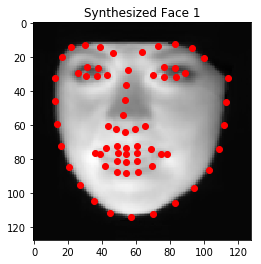

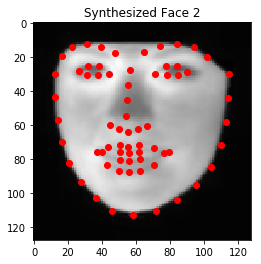

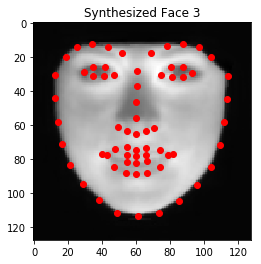

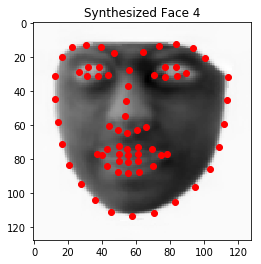

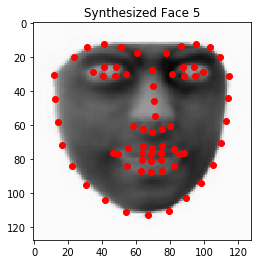

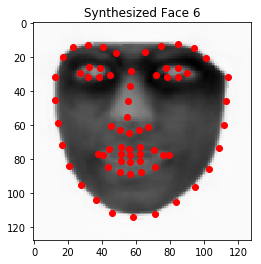

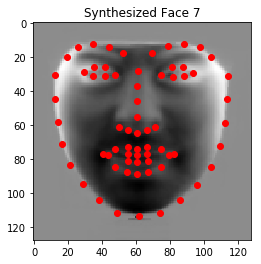

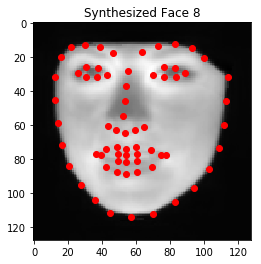

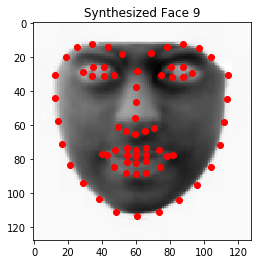

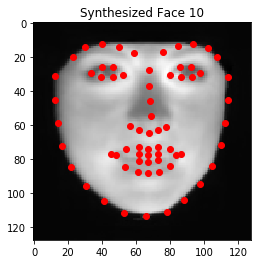

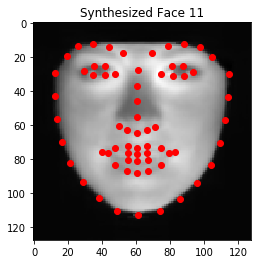

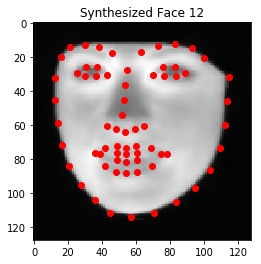

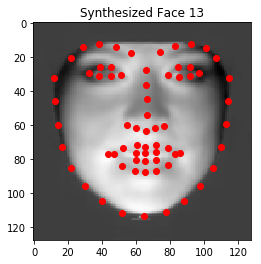

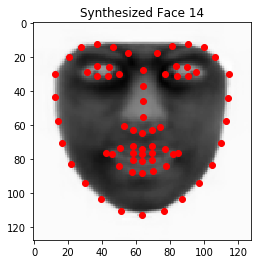

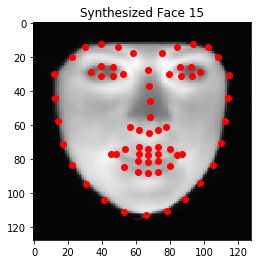

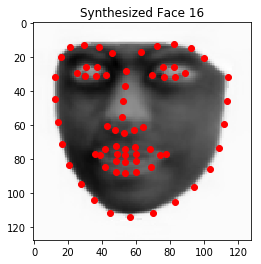

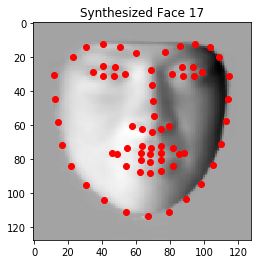

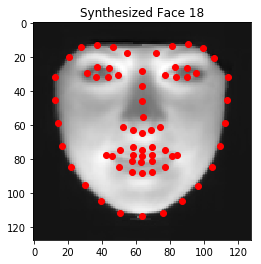

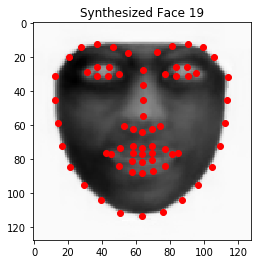

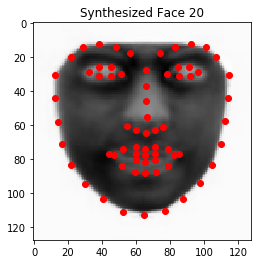

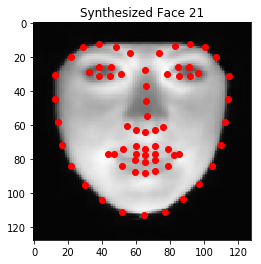

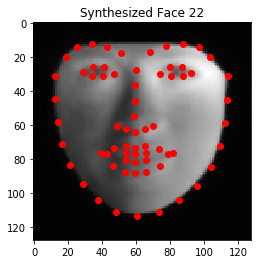

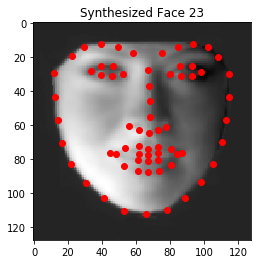

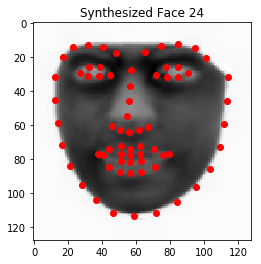

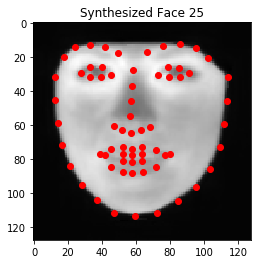

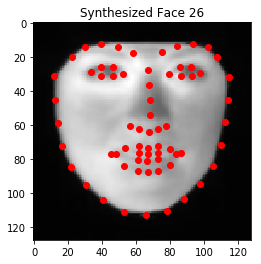

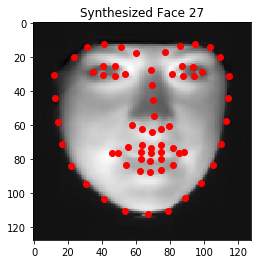

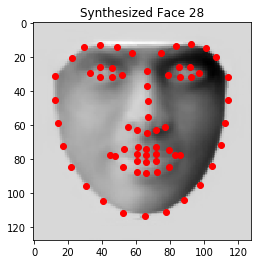

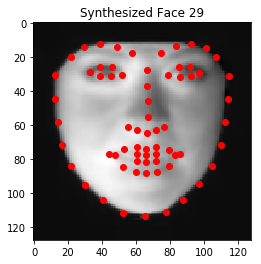

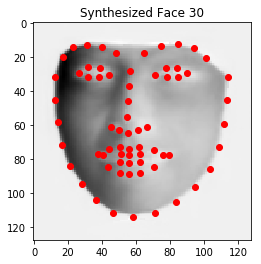

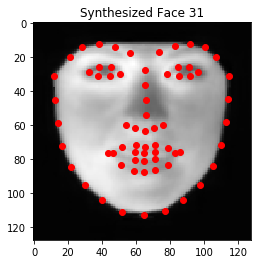

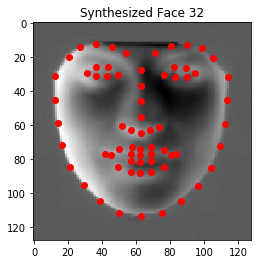

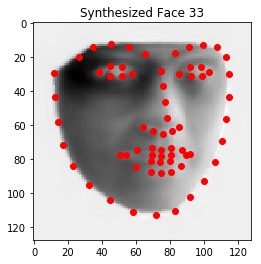

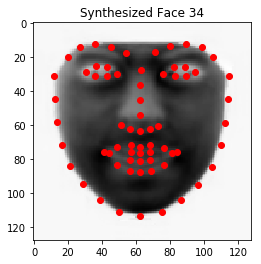

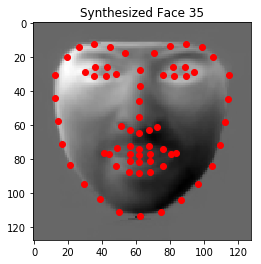

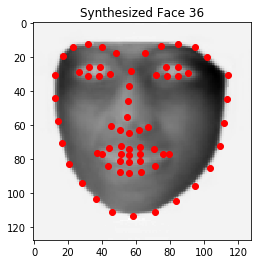

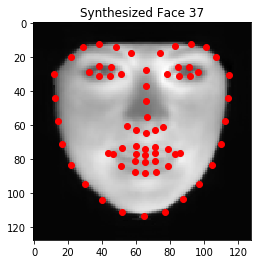

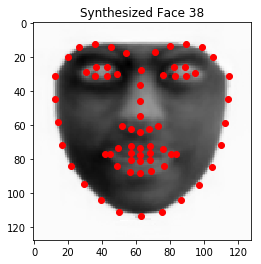

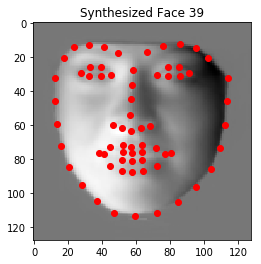

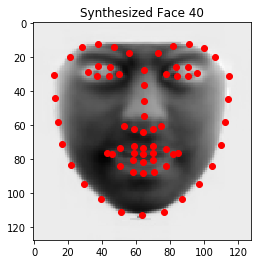

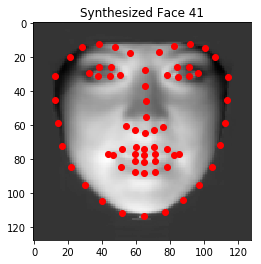

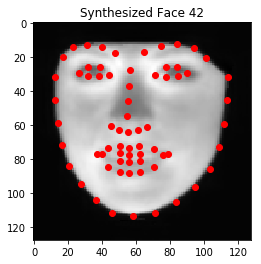

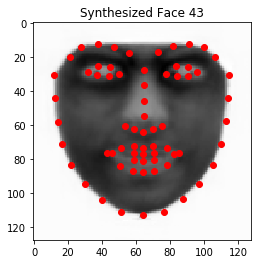

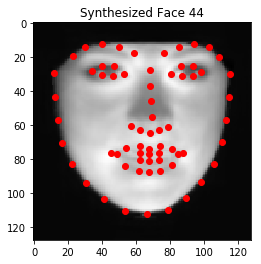

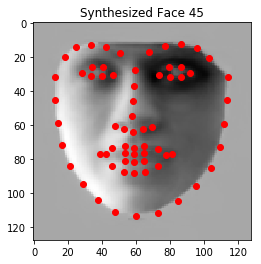

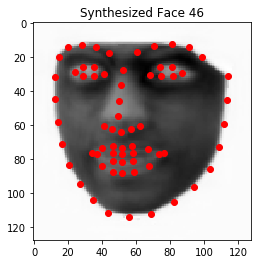

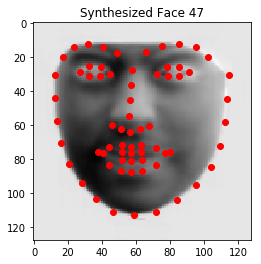

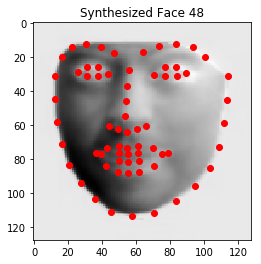

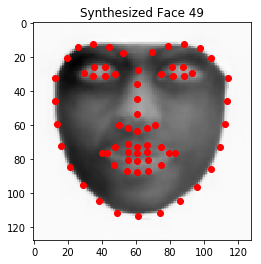

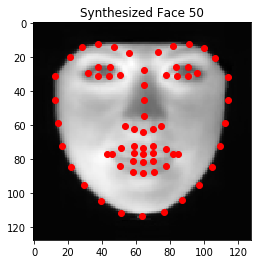

In [128]:
#PCA Part 4
#Appearance Synthesis

synth_app = np.zeros(shape=(50,16384))
synth_proj = np.zeros(shape=(50, 50))
rand_app = np.zeros(shape=(50))
X_app_synth = X_w_eigen[:,0:50]


for n1 in range(50):
    for n2 in range(50):
        rand_app[n2] = (np.random.normal(loc=0.0,scale=S_w[n2]))
    synth_proj[n1,:] = rand_app
    synth_app[n1, :] = np.dot(X_app_synth, synth_proj[n1,:])
    synth_app[n1, :] = synth_app[n1, :] + X_mean
    points = synth_app[n1, :].reshape(128,128,1)
    dlms = X_landmarks_mean.reshape(68, 2)
    points = mywarper.warp(points, dlms , synth_lm[n1, :].reshape(68,2))
    points = points.reshape(128,128)
    plt.imshow(points, cmap="gray")
    plt.title("Synthesized Face " + str(n1+1))
    points = synth_lm[n1, :].reshape(68,2)
    plt.scatter(points[:,0], points[:,1], c='r')
    plt.show()



In [325]:
#FLD

female_images = os.listdir("./female_images")
female_images.sort()
                    

label = [0] * 1000
female_image_filenames = []
for _file in female_images:
    female_image_filenames.append(_file)
    
for i in range(len(im_list)):
    if im_list[i] in female_image_filenames:
        label[i] = 1
        
        
appearance_proj = np.dot(X_w_eigen[:,0:50].T, X_w.T)
#print(appearance_proj.shape)      50*800

landmarks_proj = np.dot(X_landmarks_eigen[:,0:10].T, X_landmarks.T)
#print(landmarks_proj.shape)       10, 800

proj = np.vstack((appearance_proj, landmarks_proj))
#print(proj.shape)                  60, 800

proj = proj.transpose()
#                800, 60

mlabel = label[0:800].count(0)
flabel = label[0:800].count(1)
proj_male = np.zeros((mlabel, 60))
proj_female = np.zeros((flabel, 60))
count1 = 0
count2 = 0
for i in range(800):
    if label[i] == 0:
        proj_male[count1] = proj[i]
        count1 += 1
    else:
        proj_female[count2] = proj[i]
        count2 += 1
        
proj_male_mean = np.mean(proj_male, axis = 0)
proj_female_mean = np.mean(proj_female, axis = 0)    

proj_male_sub_mean = proj_male - proj_male_mean
proj_female_sub_mean = proj_female - proj_female_mean


S1 = np.dot(proj_male_sub_mean.T, proj_male_sub_mean)

S2 = np.dot(proj_female_sub_mean.T, proj_female_sub_mean)

Sw = S1 + S2

Sw_inv = np.linalg.inv(Sw)

W = np.dot(Sw_inv, (proj_male_mean - proj_female_mean))


C = np.dot(W.reshape(1, 60), (0.5)* (proj_male_mean + proj_female_mean).reshape(60, 1))
     
print(C)
appearance_proj_test = np.dot(X_w_eigen[:,0:50].T, X_w_test_sub_mean.T)

landmarks_proj_test = np.dot(X_landmarks_eigen[:,0:10].T, X_landmarks_test_sub_mean.T)

proj_test = np.vstack((appearance_proj_test, landmarks_proj_test))

#proj_test = proj_test.transpose()


op = np.dot(W.T, proj_test)

#print(op)

for m in range(len(op)):
    if(op[m]<C):
        op[m] = 1
    else:
        op[m] = 0

error_rate = np.count_nonzero(op - label[800:1000])
print("Error rate is %s"%error_rate)



[[0.00134376]]
Error rate is 12


In [327]:
#FLD Part 2

mlabel = label[0:800].count(0)
flabel = label[0:800].count(1)
proj_male = np.zeros((mlabel, 50))
proj_female = np.zeros((flabel, 50))
j = 0
k = 0
for i in range(800):
    if label[i] == 0:
        proj_male[j] = (appearance_proj.T)[i]
        j += 1
    else:
        proj_female[k] = (appearance_proj.T)[i]
        k += 1
print(j, k, np.shape(proj_male), np.shape(proj_female))

335 465 (335, 50) (465, 50)


[[0.00119649]] [[0.00014156]]


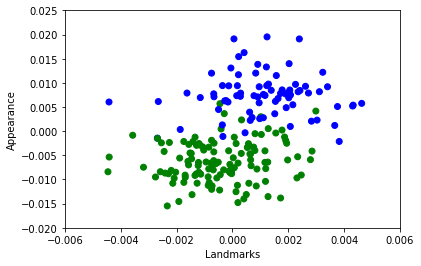

In [328]:
proj_male_mean = np.mean(proj_male, axis = 0)
proj_female_mean = np.mean(proj_female, axis = 0)
proj_male_sub_mean = proj_male - proj_male_mean
proj_female_sub_mean = proj_female - proj_female_mean

S1_app = np.dot(proj_male_sub_mean.T, proj_male_sub_mean)
S2_app = np.dot(proj_female_sub_mean.T, proj_female_sub_mean)

Sw_app = S1_app + S2_app
Sw_inv_app = np.linalg.inv(Sw_app)
W_app = np.dot(Sw_inv_app, (proj_male_mean - proj_female_mean))

C_app = np.dot(W_app.reshape(1, 50), (0.5)* (proj_male_mean + proj_female_mean).reshape(50, 1))

mlabel = label[0:800].count(0)
flabel = label[0:800].count(1)
proj_landmark_male = np.zeros((mlabel, 10))
proj_landmark_female = np.zeros((flabel, 10))
j = 0
k = 0
for i in range(800):
    if label[i] == 0:
        proj_landmark_male[j] = landmarks_proj.T[i]
        j += 1
    else:
        proj_landmark_female[k] = landmarks_proj.T[i]
        k += 1
        
#Find the mean
proj_landmark_male_mean = np.mean(proj_landmark_male, axis = 0)
proj_landmark_female_mean = np.mean(proj_landmark_female, axis = 0)

##### Subtract mean from the images
proj_landmark_male_sub_mean = proj_landmark_male - proj_landmark_male_mean
proj_landmark_female_sub_mean = proj_landmark_female - proj_landmark_female_mean

S1_lm = np.dot(proj_landmark_male_sub_mean.T, proj_landmark_male_sub_mean)
S2_lm = np.dot(proj_landmark_female_sub_mean.T, proj_landmark_female_sub_mean)

Sw_lm = S1_lm + S2_lm
Sw_inv_lm = np.linalg.inv(Sw_lm)
W_lm = np.dot(Sw_inv_lm, (proj_landmark_male_mean - proj_landmark_female_mean))

C_lm = np.dot(W_lm.reshape(1, 10), (0.5)* (proj_landmark_male_mean + proj_landmark_female_mean).reshape(10, 1))

op_app = np.dot(W_app.T, appearance_proj_test)
op_lm = np.dot(W_lm.T, landmarks_proj_test)

import matplotlib.lines as mlines
print(C_app, C_lm)

point_color = ['g'] * 200
for i in range(200):
    if label[i + 800] == 0:
        point_color[i] = 'b'
        
plt.scatter(op_lm.T, op_app.T, color = point_color)
#plt.plot([Landmark_c, 0], [0, App_c])
plt.axis([-0.006, 0.006, -0.02, 0.025])
plt.xlabel('Landmarks')
plt.ylabel('Appearance')
plt.show()   

In [ ]:
#END